<a href="https://colab.research.google.com/github/Raja-18/machine_learning/blob/master/6_1_FFN_BinaryClass_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                                           #for np arrays

import matplotlib.pyplot as plt                              #for ploting
import matplotlib.colors

from tqdm import tqdm_notebook                               #for analysing time taken for each epochs

from sklearn.metrics import accuracy_score, mean_squared_error    # for evaluation 
from sklearn.model_selection import train_test_split               # for test and train split
from sklearn.datasets import make_moons, make_circles              # for making costum clustered datasets

plt.style.use('seaborn')

In [ ]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])  #color map for sigmoid 

# FeedForward Neural Network (binary classification)

In [ ]:
class genericFFN:
  
  def __init__(self, n_inputs, hidden_sizes=[2]):
    self.nx = n_inputs                                                          #no of inputs (ex:x1, x2)
    self.ny = 1                                                                 #for binary classification one op neuron is inough 
    self.nh = len(hidden_sizes)                                                 #no of hidden layers
    self.sizes = [self.nx] + hidden_sizes + [self.ny]                           #which gives the overall size of NN L0 to Lnh+1
    
    self.W = {}                                                                 #each layer W's are stored in each i of dictionary
    self.B = {}                                                                 #each layer B's are stored in each i of dictionary 
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])             
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)                                                #transforming into 2d array
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]             #pre activation
      self.H[i+1] = self.sigmoid(self.A[i+1])                                   #activation
    return self.H[self.nh+1]                                                    
  
  def grad_sigmoid(self, x):
    return x*(1-x) 
    
  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))
    
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))
      
    if display_loss:
      loss = {}
    
    for e in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dW = {}                                                                    #initilising dw and db not w b
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]
        
      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze() #The squeeze() function is used to remove single-dimensional entries from the shape of an array

# Example 1 (moons)

In [ ]:
data,labels=make_moons(n_samples=1000,random_state=0,noise=0.2)                 # change the noise to modify the data
print(data.shape,labels.shape)

(1000, 2) (1000,)


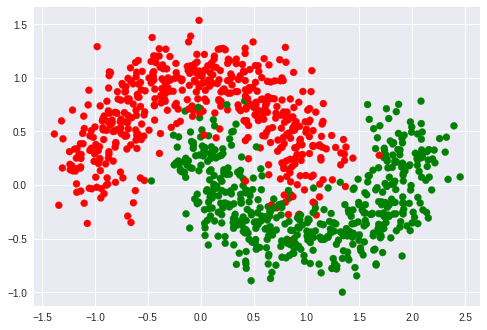

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(data,labels,random_state=0,stratify=labels)

In [ ]:
print(x_train.shape,y_train.shape)

(750, 2) (750,)


In [ ]:
print(x_val.shape,y_val.shape)

(250, 2) (250,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


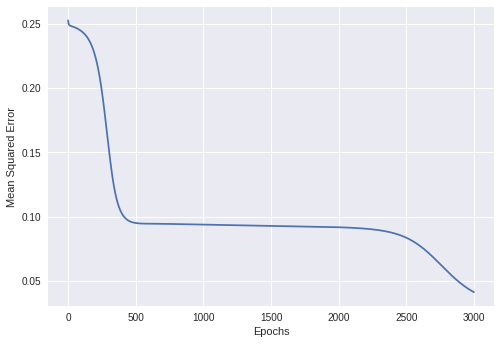

In [ ]:
gffn=genericFFN(2,[4,4,4])
gffn.fit(x_train,y_train,epochs=3000,learning_rate=.00075,display_loss=True)

In [ ]:
y_pred_train=gffn.predict(x_train)
y_pred_binarised_train=(y_pred_train>=0.5).astype("int").ravel()
y_pred_val=gffn.predict(x_val)
y_pred_binarised_val=(y_pred_val>=0.5).astype("int").ravel()
accuracy_train=accuracy_score(y_pred_binarised_train,y_train)
accuracy_val=accuracy_score(y_pred_binarised_val,y_val)

print("training accuracy: ",round(accuracy_train,2))
print("validation accuracy: ",round(accuracy_val,2))

training accuracy:  0.95
validation accuracy:  0.96


### predicted train plot
* small dots- correctly predicted
* large dots- wrongly predicted 

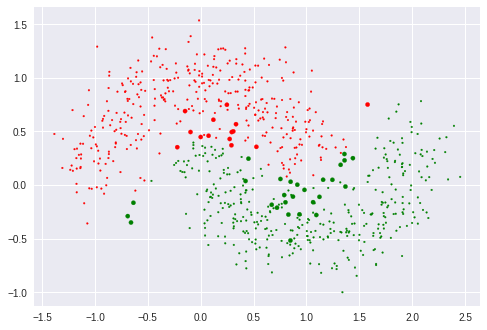

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(y_pred_binarised_train-y_train)+0.2))
plt.show()

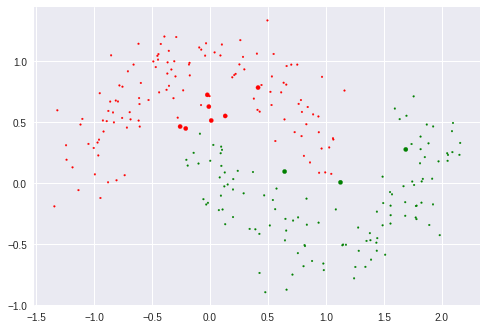

In [ ]:
plt.scatter(x_val[:,0],x_val[:,1],c=y_pred_binarised_val,cmap=my_cmap,s=15*(np.abs(y_pred_binarised_val-y_val)+0.2))
plt.show()

# Example 2 (circles)

In [ ]:
data,labels=make_circles(n_samples=1000,random_state=0,noise=0.15,factor=0.4) #change factor and noise to change shape of circle
print(data.shape,labels.shape)

(1000, 2) (1000,)


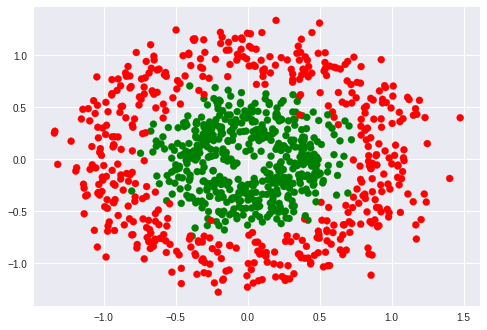

In [ ]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(data,labels,random_state=0,stratify=labels)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


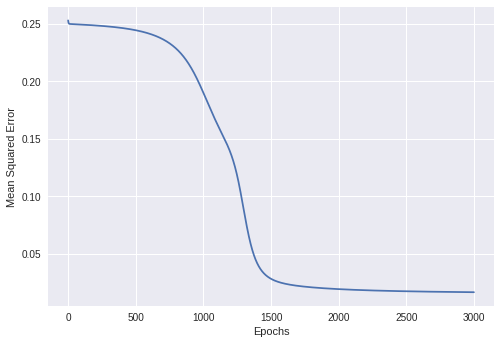

In [ ]:
gffn1=genericFFN(2,[4,4,4])
gffn1.fit(x_train,y_train,epochs=3000,learning_rate=.00075,display_loss=True)

In [ ]:
y_pred_train=gffn1.predict(x_train)
y_pred_binarised_train=(y_pred_train>=0.5).astype("int").ravel()
y_pred_val=gffn1.predict(x_val)
y_pred_binarised_val=(y_pred_val>=0.5).astype("int").ravel()
accuracy_train=accuracy_score(y_pred_binarised_train,y_train)
accuracy_val=accuracy_score(y_pred_binarised_val,y_val)

print("training accuracy: ",round(accuracy_train,2))
print("validation accuracy: ",round(accuracy_val,2))

training accuracy:  0.98
validation accuracy:  0.98


### predicted train plot
* small dots- correctly predicted
* large dots- wrongly predicted 

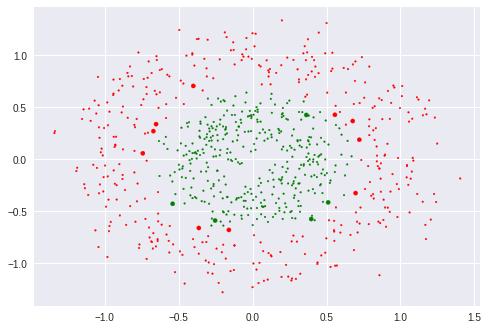

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(y_pred_binarised_train-y_train)+0.2))
plt.show()

### predicted test plot

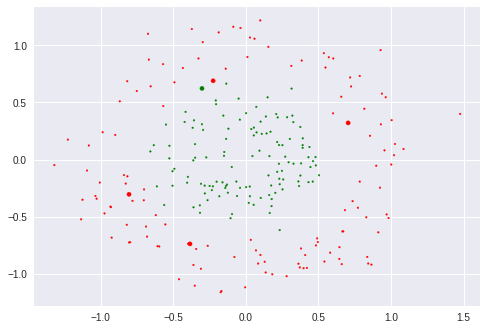

In [ ]:
plt.scatter(x_val[:,0],x_val[:,1],c=y_pred_binarised_val,cmap=my_cmap,s=15*(np.abs(y_pred_binarised_val-y_val)+0.2))
plt.show()